# Banned Books: analyzing Reddit discourse on the rise of book banning from 2020 to the present in the U.S.

### Research Question
How do inhabitants in the United States feel about the rise in books being banned in schools, libraries, and universities on Reddit? How has this evolved from 2020 until present day? 

### Background
Books are being banned from schools and public libraries at high rates, and organizations such as the American Library Association (ALA) document and track the number of attempts to censor books, materials, and services across schools libraries. The ALA Office for Intellectual Freedom has collected this data for the past 20 years and has found a sharp rise in attempts to censor books; the number of unique book titles challenged in the U.S. was 223 in 2020, it escalated to 1,858 in 2021, and rose to 2,571 in 2022 (American Library Association, 2023).[^1] This increase in censorship has caused fighting among communities which is amplified by social media and politics. Campaigns are formed to censor subjects such as LGBTQ rights, gender studies, and racial inequality. In fact, among the unique book titles challenged in 2021, the majority of these topics centered on LGBTQ people or on people of color. Partisan groups are organizing to remove books that don't agree with a political agenda. There have also been increases in proposed legislation to place restrictions on libraries (Alter, A., Harris, E., 2023).[^2] 

### Data
For this study, Reddit is the social media platform that will be used to retrieve data. There are a few subreddits that can be used including: r/education, r/books, r/libraries, r/booksuggestions, r/news, r/literature, r/FreeSpeech, r/politics. I will be using the Reddit API to access the data. The posts will be collected among the subreddits which have posts relating to book bans in schools, libraries, and universities. The amount of bans is highest for schools and libraries, while a minimal amount happen in universities and the amount of posts will try to match this distribution as well. At least 500 data points will be collected pertaining to posts on book bans in schools, libraries, and universities. The data will also focus on January 2020 until present day since the amount of bans has risen dramatically beginning in 2021, allowing for me to see what might have been before the rise in bans, the initial rise, and present day when the number is at an all time high.

### Method
The Reddit API will be used to search through the subreddits, and possibly expand to include more than the initial list noted so that at least 500 data points are collected. This will include post titles, post content, comments, number of comments, number of upvotes, the timestamp of each post, and its associated subreddit name. 


### References
[^1]: American Library Association. (2023, October). *Book Ban Data*. American Library Association a website of the ALA Office for Intellectual Freedom. https://www.ala.org/advocacy/bbooks/book-ban-data 
[^2]: Alter, A., Harris, E. (2023, March). *Attempts to Ban Books Doubled in 2022*. New York Times. https://www.nytimes.com/2023/03/23/books/book-ban-2022.html
[^3]: Wu, Shiwen, and Bo Mai. (2019, May). *Talking about and beyond censorship: Mapping topic clusters in the Chinese Twitter sphere.* International Journal of Communication 13. 
[^4]: Stine, Z., Agarwal, N. (2020, July). *Comparative Discourse Analysis Using Topic Models: Contrasting Perspectives on China from Reddit*. International Conference on Social Media and Society. https://doi-org.proxyiub.uits.iu.edu/10.1145/3400806.3400816
[^5]: Churchill, R., Singh, L. (2022, November). *The Evolution of Topic Modeling*. ACM Comput. Surv.54, 10s, Article 215. https://doi.org/10.1145/3507900

In [1]:
from fuzzywuzzy import fuzz
import pandas as pd
import praw

# Initialize Reddit API client using PRAW
reddit = praw.Reddit(client_id='xxx',
                     client_secret='xxx',
                     user_agent='xxx',
)

/Users/ingridarreola/Library/Python/3.9/lib/python/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/Users/ingridarreola/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Method: Data Collection
The Reddit API will be used to search through the subreddits, and possibly expand to include more than the initial list noted so that at least 500 data points are collected. This will include post titles, post content, comments, number of comments, number of upvotes, the timestamp of each post, and its associated subreddit name.

#### Search through subreddits

In [2]:
# Specify the subreddits, keywords for the search for book bans, and the fuzzy matching threshold to hopefully find the ones that match our search
subreddits = ["BlackPeopleTwitter"] #"education", "books", "libraries", "news", "literature", "FreeSpeech", "politics",  "bannedbooks", "AskAnAmerican", "tumblr", "NoStupidQuestions",  "WitchesVsPatriarchy",   "politics", WhitePeopleTwitter, OutOfTheLoop
search_terms = ["book ban", "school ban", "ban books", "books"] #"Book Ban", "Banning Books", "censorship", "banned", 
fuzzy_match_threshold = 0.5  # Adjust the threshold as needed

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Title', 'Similarity Scores', 'URL', 'Subreddit', 'Score', 'Timestamp', 'ID', 'Comment Count', 'Up Votes', 'Down Votes', 'Post'])

# Loop through the subreddits
for subreddit in subreddits:
    # Perform a search for posts in the current subreddit
    results = list(reddit.subreddit(subreddit).search(' '.join(search_terms), limit=99))

    # Loop through the results and process the posts
    for post in results:
        # Get the post title and content (you can include other attributes as needed)
        post_title = post.title  # the post title
        post_content = post.selftext  # the post content
        author = post.author.name if post.author else '[deleted]'
        score = post.score  # the post score
        created_utc = post.created_utc  # super important our timestamp...which has to be converted later
        object_id = post.id  # the object ID
        post_author = post.author  # author of the post
        comment_count = post.num_comments  # number of comments
        subreddit = post.subreddit_name_prefixed  # subreddit name
        up_votes = post.ups  # the number of upVotes
        down_votes = post.downs  # the number of downVotes
        upvote_ratio = post.upvote_ratio  # the number of upVotes compared to downvotes

        # Compare the post content to the search terms using fuzzy matching
        similarity_scores = [fuzz.ratio(term, post_content) for term in search_terms]

        # Check if any score is above the threshold
        if any(score >= fuzzy_match_threshold for score in similarity_scores):
            # If at least one term has a high similarity score, consider it a match
            data = {
                'Title': post_title,
                'Similarity Scores': similarity_scores,
                'URL': post.url,
                'Subreddit': subreddit,
                'Score': score,
                'Timestamp': created_utc,
                'ID': object_id,
                'Comment Count': comment_count,
                'Up Votes': up_votes,
                'Down Votes': down_votes,
                'Post': post_content
            }

            # Append data to the DataFrame using pd.concat
            df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

            # Originally I was just PRINTING the results before storing into a data frame
            print(f"Title: {post_title}")
            print(f"Similarity Scores: {similarity_scores}")
            print(f"URL: {post.url}")
            print(f"Subreddit: {subreddit}")
            print(f"Score: {score}")
            print(f"Timestamp: {created_utc}")
            print(f"ID: {object_id}")
            print(f"Comment Count: {comment_count}")
            print(f"Up Votes: {up_votes}")
            print(f"Down Votes: {down_votes}")
            print(f"Post: {post_content}")
            print("\n")

# Print the resulting DataFrame
#print(df)


Title: Political posts are banned.
Similarity Scores: [1, 0, 1, 0]
URL: https://www.reddit.com/r/BlackPeopleTwitter/comments/4anlg5/political_posts_are_banned/
Subreddit: r/BlackPeopleTwitter
Score: 2416
Timestamp: 1458131692.0
ID: 4anlg5
Comment Count: 206
Up Votes: 2416
Down Votes: 0
Post: It's election year, as we all know, and redditors everywhere are competing to see which political candidate they can wank off the hardest. This has resulted in a large influx of people in this sub wanting to promote or hate on their candidate of choice.

As much as we mods like to laugh at pathetic shills, we no longer have the patience to tolerate r/BlackPeopleTwitter becoming a political battleground.

Therefore, effective immediately, we will be removing any posts regarding politics or political figures. This is to ensure that we are equally unfair to people of all political affiliations. Any comments starting political arguments under unrelated posts fall afoul of Rule 2, and will also be remov

/var/folders/6n/qvq0486x3rgffl33nn8j4mb00000gn/T/ipykernel_90713/2336287198.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)


Printing out the comments for the posts

In [ ]:
# List of post IDs
post_ids = ["138il7e", "16y1i1g", "14rrj3l", "sexnx6", "1337yzw", "169mibe", "xqkdt9", "xmeyv6", "xzyfyx", "16nev6q", "xaqdiw", "1518z9w", "q0gq7f", "15j17yl"]

# Loop through the post IDs and retrieve comments
for post_id in post_ids:
    post = reddit.submission(id=post_id)

    print(f"Comments for post ID: {post_id}")

    # Get the comments for the post
    comments = post.comments

    for comment in comments[:10]:
        print("Printing comment...")
        print("Comment body -", comment.body)  # the comment body
        print("Author -", comment.author)  # comment author
        print("\n")



Comments for post ID: 138il7e
Printing comment...
Comment body - [The Moms for Liberty are Right: Books are Dangerous.](https://suburbanturmoil.com/moms-for-liberty-books-are-dangerous-banned-books/2022/02/15/)  


>Books didn’t tell me how to think; they simply gave me more information — information I wasn’t necessarily getting from the people in my community. Sometimes I agreed with what I was reading, sometimes I didn’t. Books helped me form an educated opinion.  
They also made me feel a deep need to examine my core beliefs. As a teenager, I was constantly questioning my teachers, my parents, and my church leaders. I wasn’t trying to be disrespectful; I simply wanted to know why the adults I trusted believed what they did. I still couldn’t understand why my community tried so hard to keep out people with diverse backgrounds, or how my pastor could be so absolutely certain that his theology was the absolute truth. I wanted to hear everyone’s reasoning, and then decide for myself wha

#### Search through comments
Getting the comments for the posts that answer the research question; then reviewing these and confirming that they answer the research question that I'm interested in, saving the CSV output with just the data that is needed

In [ ]:

# List of post IDs
post_ids = ["138il7e", "16y1i1g", "14rrj3l", "sexnx6", "1337yzw", "169mibe", "xqkdt9", "xmeyv6", "xzyfyx", "16nev6q", "xaqdiw", "1518z9w", "q0gq7f", "15j17yl"]

# Initialize a list to store the comments data
comments_data = []

# Loop through the post IDs and retrieve comments
for post_id in post_ids:
    post = reddit.submission(id=post_id)

    print(f"Comments for post ID: {post_id}")

    # Get the comments for the post
    comments = post.comments

    # Additional details for the post
    post_title = post.title
    post_url = post.url
    subreddit = post.subreddit_name_prefixed
    score = post.score
    created_utc = post.created_utc
    object_id = post.id
    comment_count = post.num_comments
    up_votes = post.ups
    down_votes = post.downs
    post_content = post.selftext

    for comment in comments[:10]:
        comment_data = {
            'Post_ID': post_id,
            'Comment_Body': comment.body,
            'Author': str(comment.author),
            'Title': post_title,
            'URL': post_url,
            'Subreddit': subreddit,
            'Score': score,
            'Timestamp': created_utc,
            'ID': object_id,
            'Comment Count': comment_count,
            'Up Votes': up_votes,
            'Down Votes': down_votes,
            'Post': post_content,
        }
        comments_data.append(comment_data)

# Create a DataFrame from the comments data
comments_df = pd.DataFrame(comments_data)

# Save the DataFrame to a CSV file
comments_df.to_csv('/Users/ingridarreola/Documents/comments_data_with_details_1.csv', index=False)

# Print the DataFrame
print(comments_df)


Comments for post ID: xfy3wj
Comments for post ID: tc3dti
Comments for post ID: 16n2xf9
Comments for post ID: 13qk7nk
Comments for post ID: 159kiuo
    Post_ID                                       Comment_Body  \
0    xfy3wj  Reminder: this subreddit is meant to be a plac...   
1    xfy3wj  Good news. With that said though, I don't real...   
2    xfy3wj              Let’s Reverse Uno Card the Book Bans!   
3    xfy3wj  I had to write a paper about the life and work...   
4    xfy3wj  In a twisted sort of way, book bans have gotte...   
5    xfy3wj            Inb4 Republicans ban bans on book bans.   
6    xfy3wj  John Green [has a great video](https://youtu.b...   
7    xfy3wj  After the Taliban began to ban book banning ba...   
8    xfy3wj  I mean, seriously. we have e-books now, every ...   
9    xfy3wj         What's next? Banning the ban on book bans?   
10   tc3dti  It's about children in 6th grade that have to ...   
11  16n2xf9                                          [remove

#### Complete Post Dataset
This is the full list of the posts that will be used for the project, the complete dataset

In [ ]:
import pandas as pd

# List of post IDs you want to include in the DataFrame
post_ids_to_include = ["138il7e", "16y1i1g", "14rrj3l", "sexnx6", "1337yzw", "169mibe", "xqkdt9", "xmeyv6", "xzyfyx", "16nev6q", "xaqdiw", "1518z9w", "q0gq7f", "15j17yl", "sintay", "sh6xcz", "skiksi", "12911xq", "138en8z", "13po0l0", "10vxiv4", "132pghk", "sh8vb8", "z13uet", "y5kwu2", "y0dl2n", "15ib6ad", "x2h8i9", "125rrlw", "16bb0j3", "129voy1", "w3rbhb", "sko2y0", "149cuw0", "11ltuzh", "112hzqf", "v0e6m8", "xbtsd5", "149lypo", "172cs5g", "16iwevf", "xz8a54", "10rsjh2", "13ql85b", "13qk7ev", "qhnx68", "162fhmo", "162fhmo", "y2g0jb", "1148kni", "wuiag6", "yqyaqd", "wwgnx8", "xgpkzo", "sblauv", "si9hyz", "11zm1vc", "16uan0i", "wgvvu5", "ptciw7", "sl8i0t", "15nqzny", "16nskog", "10n3bre", "11rx27w", "11rx194", "11rx06o", "12i7rhy", "xfy3wj", "tc3dti", "16n2xf9", "13qk7nk", "159kiuo"]

# Initialize an empty list to store the data
data_list = []

# Loop through the post IDs and retrieve post data
for post_id in post_ids_to_include:
    post = reddit.submission(id=post_id)

    post_title = post.title
    post_content = post.selftext
    score = post.score
    created_utc = post.created_utc
    object_id = post.id
    comment_count = post.num_comments
    subreddit = post.subreddit.display_name
    up_votes = post.ups
    down_votes = post.downs

    data = {
        'Title': post_title,
        'Post': post_content,
        'URL': post.url,
        'Subreddit': subreddit,
        'Score': score,
        'Timestamp': created_utc,
        'ID': object_id,
        'Comment Count': comment_count,
        'Up Votes': up_votes,
        'Down Votes': down_votes,
    }

    data_list.append(data)

# Create a DataFrame from the list of data
post_df = pd.DataFrame(data_list)

# Save the DataFrame to a CSV file
post_df.to_csv('/Users/ingridarreola/Documents/post_data.csv', index=False)


The API wasn't finding all the posts that were actually in the subreddit, so I had to look through individual usernames and find the POST_ID associated with the project so that they could be added to the dataset

In [ ]:
# Searching for the specific username
target_username = 'intelligentreviews'

# Initialize a list to store the results
user_posts = []

# Get the user object
user = reddit.redditor(target_username)

# Loop through the user's new submissions
for submission in user.submissions.new(limit=None):
    post_title = submission.title
    post_content = submission.selftext
    score = submission.score
    created_utc = submission.created_utc
    object_id = submission.id
    comment_count = submission.num_comments
    subreddit = submission.subreddit.display_name
    up_votes = submission.ups
    down_votes = submission.downs

    # Additional data you want to store
    data = {
        'Title': post_title,
        'URL': submission.url,
        'Subreddit': subreddit,
        'Score': score,
        'Timestamp': created_utc,
        'ID': object_id,
        'Comment Count': comment_count,
        'Up Votes': up_votes,
        'Down Votes': down_votes,
        'Post': post_content
    }

    user_posts.append(data)

# At this point, I searched through results and then found the ID 

#### Complete Comment Dataset
I have several csvs which I would like to merge into one big file, this is the complete comment dataset

In [ ]:
import glob

# Create an empty list to store DataFrames
dataframes = []

# Use glob to find files with names starting with "comments_"
csv_files = glob.glob('/Users/ingridarreola/Desktop/Grad School - Data Science/Z639 - Social Media Mining/Ingrid Arreola - Paper 2/Reddit Raw Data - Paper 2 - Pre Merge/comments_*.csv')

# Loop through CSV files and read them into DataFrames
for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    dataframes.append(data)

# Concatenate the list of DataFrames into one
combined_data = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv('/Users/ingridarreola/Desktop/Grad School - Data Science/Z639 - Social Media Mining/Ingrid Arreola - Paper 2/comments_data.csv', index=False)


#### Complete Dataset Combined
Merging together the posts + comments so that I have the full dataset

In [1]:
import pandas as pd

# The first one: post dataset
posts_df = pd.read_csv('/Users/ingridarreola/Desktop/Grad School - Data Science/Z639 - Social Media Mining/Ingrid Arreola - Paper 2/Raw Data/post_data.csv')  

# The second one: comments dataset
comments_df = pd.read_csv('/Users/ingridarreola/Desktop/Grad School - Data Science/Z639 - Social Media Mining/Ingrid Arreola - Paper 2/Raw Data/comments_data.csv')

# Merge the datasets based on the 'Post_ID' field
combined_df = pd.merge(comments_df, posts_df, on='Post_ID', suffixes=('_comment', '_post'))

# Now, the 'combined_df' contains both comments and posts with the related information so next up is doing one more cleaning step so that we get a usable timestamp for the analysis


In [2]:
combined_df = pd.merge(comments_df, posts_df, on='Post_ID', suffixes=('_comment', '_post'))


In [3]:
combined_df

,Post_ID,Comment_Body,Author,Title,URL_comment,Subreddit_comment,Score_comment,Timestamp_comment,Comment Count_comment,Up Votes_comment,...,Post_comment,Post_post,Post.1,URL_post,Subreddit_post,Score_post,Timestamp_post,Comment Count_post,Up Votes_post,Down Votes_post
0,16nskog,“Goose-stepping morons like yourself should tr...,Casperboy68,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,1.695234e+09,158,1156,...,NaN,US book bans and attempted bans rise as effort...,NaN,https://theguardian.com/books/2023/sep/20/book...,news,1157,1.695234e+09,158,1157,0
1,16nskog,Welcome to needing to be 18 to get a library c...,Eyfordsucks,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,1.695234e+09,158,1156,...,NaN,US book bans and attempted bans rise as effort...,NaN,https://theguardian.com/books/2023/sep/20/book...,news,1157,1.695234e+09,158,1157,0
2,16nskog,"The party of personal freedom, ladies and gent...",freddy_guy,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,1.695234e+09,158,1156,...,NaN,US book bans and attempted bans rise as effort...,NaN,https://theguardian.com/books/2023/sep/20/book...,news,1157,1.695234e+09,158,1157,0
3,16nskog,When has banning books ever been the better mo...,miataturbo99,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,1.695234e+09,158,1156,...,NaN,US book bans and attempted bans rise as effort...,NaN,https://theguardian.com/books/2023/sep/20/book...,news,1157,1.695234e+09,158,1157,0
4,16nskog,Yep in Illinois and they are trying to find wa...,BoosterRead78,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,1.695234e+09,158,1156,...,NaN,US book bans and attempted bans rise as effort...,NaN,https://theguardian.com/books/2023/sep/20/book...,news,1157,1.695234e+09,158,1157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,15j17yl,"Book banning, as defined by this subreddit, do...",NoMagiciansAllowed,Confused on book bannings,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,1.691256e+09,7,6,...,"Hey everyone, I recently found this subreddit ...",Confused on book bannings,"Hey everyone, I recently found this subreddit ...",https://www.reddit.com/r/bannedbooks/comments/...,bannedbooks,4,1.691256e+09,7,4,0
423,15j17yl,Book banning is when a group of extremists pre...,Birchwood_Goddess,Confused on book bannings,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,1.691256e+09,7,6,...,"Hey everyone, I recently found this subreddit ...",Confused on book bannings,"Hey everyone, I recently found this subreddit ...",https://www.reddit.com/r/bannedbooks/comments/...,bannedbooks,4,1.691256e+09,7,4,0
424,15j17yl,I am a school librarian for a middle school an...,Easy-Persimmon-8540,Confused on book bannings,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,1.691256e+09,7,6,...,"Hey everyone, I recently found this subreddit ...",Confused on book bannings,"Hey everyone, I recently found this subreddit ...",https://www.reddit.com/r/bannedbooks/comments/...,bannedbooks,4,1.691256e+09,7,4,0
425,15j17yl,You know...you know you know. Your comment his...,frostflare,Confused on book bannings,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,1.691256e+09,7,6,...,"Hey everyone, I recently found this subreddit ...",Confused on book bannings,"Hey everyone, I recently found this subreddit ...",https://www.reddit.com/r/bannedbooks/comments/...,bannedbooks,4,1.691256e+09,7,4,0


In [5]:
# Need a timestamp that we can read
combined_df['Timestamp_comment'] = pd.to_datetime(combined_df['Timestamp_comment'], unit='s')
combined_df['Timestamp_comment'] = pd.to_datetime(combined_df['Timestamp_comment'], unit='s')


In [6]:
combined_df.head(2)

,Post_ID,Comment_Body,Author,Title,URL_comment,Subreddit_comment,Score_comment,Timestamp_comment,Comment Count_comment,Up Votes_comment,...,Post_comment,Post_post,Post.1,URL_post,Subreddit_post,Score_post,Timestamp_post,Comment Count_post,Up Votes_post,Down Votes_post
0,16nskog,“Goose-stepping morons like yourself should tr...,Casperboy68,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,NaN,US book bans and attempted bans rise as effort...,NaN,https://theguardian.com/books/2023/sep/20/book...,news,1157,1.695234e+09,158,1157,0
1,16nskog,Welcome to needing to be 18 to get a library c...,Eyfordsucks,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,NaN,US book bans and attempted bans rise as effort...,NaN,https://theguardian.com/books/2023/sep/20/book...,news,1157,1.695234e+09,158,1157,0


In [23]:
combined_df.to_csv('/Users/ingridarreola/Desktop/Grad School - Data Science/Z639 - Social Media Mining/Ingrid Arreola - Paper 2/combined_data_raw.csv', index=False)

### Method: Data Cleaning
The data will be pre-processed such that the text has irrelevant characters removed and it's all in lowercase. Next the data will be tokenized so that it is prepped for machine learning. Additional cleaning like removing "the" "and" "in" will be applied so that the content contains the words and phrases that are most relevant to book bans.
- First I do data cleaning on the datasets combined
- Then I'm curious about what this would look like if these were ingested as 2 separate rather than a combined, for all the sentiment analysis that follows this

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Initialize a stemmer
stemmer = PorterStemmer()

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Lowercasing
        text = text.lower()
    
        # Tokenization
        words = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in words if word not in stop_words]

        # Remove special characters, punctuation, and non-alphanumeric characters
        filtered_words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in filtered_words]

        # Stemming
        stemmed_words = [stemmer.stem(word) for word in filtered_words]

        # Combining the cleaned words back into a single text
        cleaned_text = ' '.join(stemmed_words)
    else:
        cleaned_text = ""  # If it's not a string, return an empty string

    return cleaned_text


# List of columns containing text data
text_columns = ["Comment_Body", "Post_comment", "Title", "Post_post"]

# Apply text preprocessing to each column
for column in text_columns:
    combined_df[column] = combined_df[column].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ingridarreola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ingridarreola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
combined_df.to_csv('/Users/ingridarreola/Desktop/Grad School - Data Science/Z639 - Social Media Mining/Ingrid Arreola - Paper 2/combined_data_raw_clean.csv', index=False)

In [29]:
# Trying out the cleaning for these as 2 separate things to see how it impacts the sentiment analysis
comments_df = pd.read_csv('/Users/ingridarreola/Desktop/Grad School - Data Science/Z639 - Social Media Mining/Ingrid Arreola - Paper 2/Raw Data/comments_data.csv')  

# The second one: comments dataset
posts_df = pd.read_csv('/Users/ingridarreola/Desktop/Grad School - Data Science/Z639 - Social Media Mining/Ingrid Arreola - Paper 2/Reddit Raw Data - Paper 2 - Pre Merge/post_data.csv')

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Initialize a stemmer
stemmer = PorterStemmer()

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Lowercasing
        text = text.lower()
    
        # Tokenization
        words = word_tokenize(text)

        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        filtered_words = [word for word in words if word not in stop_words]

        # Remove special characters, punctuation, and non-alphanumeric characters
        filtered_words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in filtered_words]

        # Stemming
        stemmed_words = [stemmer.stem(word) for word in filtered_words]

        # Combining the cleaned words back into a single text
        cleaned_text = ' '.join(stemmed_words)
    else:
        cleaned_text = ""  # If it's not a string, return an empty string

    return cleaned_text

# List of text columns containing text data for comments
comment_text_columns = ["Comment_Body"]

# Apply text preprocessing to each column in comments_df
for column in comment_text_columns:
    comments_df[column] = comments_df[column].apply(preprocess_text)

# List of text columns containing text data for posts
posts_text_columns = ["Post_Title", "Post_Body"]

# Apply text preprocessing to each column in posts_df
for column in posts_text_columns:
    posts_df[column] = posts_df[column].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ingridarreola/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ingridarreola/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
#reviewing these as separate clean data frames
posts_df

,Post_Title,Post_Body,URL,Subreddit,Score,Timestamp,Post_ID,Comment Count,Up Votes,Down Votes
0,teen access ban book onlin,brooklyn public librari join fight right teen ...,https://www.bklynlibrary.org/books-unbanned,books,12526,1.683285e+09,138il7e,982,12526,0
1,ban book week librari,librari set display major challeng incid hea...,https://www.reddit.com/r/Libraries/comments/16...,Libraries,62,1.696265e+09,16y1i1g,41,62,0
2,tire book ban launch local campaign ban commun,get 1000 digit ad probono consult media su...,http://fightforthefirst.org,books,1580,1.688601e+09,14rrj3l,441,1580,0
3,book ban discuss megathread,hello everyon last sever weeksmonth ve seen u...,https://www.reddit.com/r/books/comments/sexnx6...,books,843,1.643396e+09,sexnx6,564,843,0
4,experi ban book,famili even prohibit read specif book ye ev...,https://www.reddit.com/r/books/comments/1337yz...,books,72,1.682806e+09,1337yzw,128,72,0
...,...,...,...,...,...,...,...,...,...,...
66,colorado librari vote ban book ban,,https://www.coloradoan.com/story/news/local/20...,UpliftingNews,43856,1.663351e+09,xfy3wj,675,43856,0
67,might someth librari book ban,,https://i.redd.it/w8ryufslcum81.jpg,HolUp,16,1.647042e+09,tc3dti,2,16,0
68,texa teacher fire assign illustr ann frank book,,https://www.chron.com/news/houston-texas/educa...,news,20727,1.695159e+09,16n2xf9,1929,20727,0
69,florida school limit access amanda gorman s in...,,https://www.nbcnews.com/news/rcna85935,news,7632,1.684931e+09,13qk7nk,810,7632,0


Reviewing how the comments look over time in the dataset

In [10]:
combined_df['Timestamp_comment'] = pd.to_datetime(combined_df['Timestamp_comment'])
combined_df['Year'] = combined_df['Timestamp_comment'].dt.year
combined_df['Month'] = combined_df['Timestamp_comment'].dt.month

monthly_counts = combined_df.groupby(['Year', 'Month']).size().reset_index(name='Comment Count')

In [36]:
# Need a timestamp that we can read
posts_df['Timestamp'] = pd.to_datetime(posts_df['Timestamp'], unit='s')
comments_df['Timestamp'] = pd.to_datetime(comments_df['Timestamp'], unit='s')


# applying the same cleaning step to our 2 separate data frames too
posts_df['Timestamp'] = pd.to_datetime(posts_df['Timestamp'])
posts_df['Year'] = posts_df['Timestamp'].dt.year
posts_df['Month'] = posts_df['Timestamp'].dt.month

monthly_counts = posts_df.groupby(['Year', 'Month']).size().reset_index(name='Comment Count')

comments_df['Timestamp'] = pd.to_datetime(comments_df['Timestamp'])
comments_df['Year'] = comments_df['Timestamp'].dt.year
comments_df['Month'] = comments_df['Timestamp'].dt.month

monthly_counts = comments_df.groupby(['Year', 'Month']).size().reset_index(name='Comment Count')

In [57]:
comments_df.head(2)

,Post_ID,Comment_Body,Author,Title,URL,Subreddit,Score,Comment Count,Up Votes,Down Votes,Post,Year,Month,Comment_Body_sentiment,VADER_Sentiment
Timestamp,,,,,,,,,,,,,,,
2023-09-20 18:25:58,16nskog,goosestep moron like tri read book instead bur...,Casperboy68,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,NaN,2023,9,-0.8,"{'neg': 0.234, 'neu': 0.584, 'pos': 0.182, 'co..."
2023-09-20 18:25:58,16nskog,welcom need 18 get librari card,Eyfordsucks,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,NaN,2023,9,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


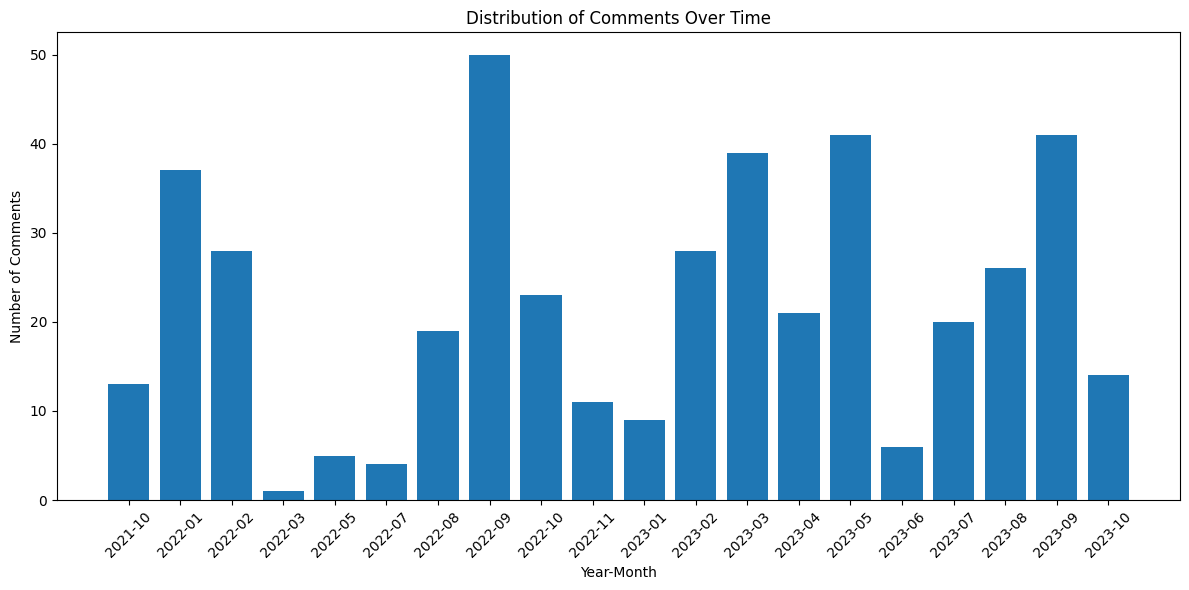

In [7]:
import matplotlib.pyplot as plt


combined_df['Timestamp_comment'] = pd.to_datetime(combined_df['Timestamp_comment'])
combined_df['Year-Month'] = combined_df['Timestamp_comment'].dt.strftime('%Y-%m')

monthly_counts = combined_df['Year-Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.xlabel('Year-Month')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd


# Function to assign quarters based on year and month
def assign_quarter(timestamp):
    quarter = (timestamp.month - 1) // 3 + 1
    return f'Q{quarter} {timestamp.year}'

# Apply the function to create a new column
combined_df['Quarter'] = combined_df['Timestamp_comment'].apply(assign_quarter)

# Display the resulting DataFrame
combined_df


,Post_ID,Comment_Body,Author,Title_comment,URL_comment,Subreddit_comment,Score_comment,Timestamp_comment,Comment Count_comment,Up Votes_comment,...,Title_post,Post_post,URL_post,Subreddit_post,Score_post,Timestamp_post,Comment Count_post,Up Votes_post,Down Votes_post,Quarter
0,16nskog,goosestep moron like tri read book instead ...,Casperboy68,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,us book ban attempt ban rise effort extend pub...,,https://theguardian.com/books/2023/sep/20/book...,news,1157,2023-09-20 18:25:58,158,1157,0,Q3 2023
1,16nskog,welcom need 18 get librari card,Eyfordsucks,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,us book ban attempt ban rise effort extend pub...,,https://theguardian.com/books/2023/sep/20/book...,news,1157,2023-09-20 18:25:58,158,1157,0,Q3 2023
2,16nskog,parti person freedom ladi gentlemen,freddy_guy,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,us book ban attempt ban rise effort extend pub...,,https://theguardian.com/books/2023/sep/20/book...,news,1157,2023-09-20 18:25:58,158,1157,0,Q3 2023
3,16nskog,ban book ever better moral choic list parti g...,miataturbo99,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,us book ban attempt ban rise effort extend pub...,,https://theguardian.com/books/2023/sep/20/book...,news,1157,2023-09-20 18:25:58,158,1157,0,Q3 2023
4,16nskog,yep illinoi tri find way around antibook ban l...,BoosterRead78,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,us book ban attempt ban rise effort extend pub...,,https://theguardian.com/books/2023/sep/20/book...,news,1157,2023-09-20 18:25:58,158,1157,0,Q3 2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,15j17yl,book ban defin subreddit anyth book store pu...,NoMagiciansAllowed,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,2023-08-05 17:17:52,7,6,...,confus book ban,hey everyon recent found subreddit question r...,https://www.reddit.com/r/bannedbooks/comments/...,bannedbooks,4,2023-08-05 17:17:52,7,4,0,Q3 2023
432,15j17yl,book ban group extremist pressur school librar...,Birchwood_Goddess,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,2023-08-05 17:17:52,7,6,...,confus book ban,hey everyon recent found subreddit question r...,https://www.reddit.com/r/bannedbooks/comments/...,bannedbooks,4,2023-08-05 17:17:52,7,4,0,Q3 2023
433,15j17yl,school librarian middl school crazi abl open...,Easy-Persimmon-8540,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,2023-08-05 17:17:52,7,6,...,confus book ban,hey everyon recent found subreddit question r...,https://www.reddit.com/r/bannedbooks/comments/...,bannedbooks,4,2023-08-05 17:17:52,7,4,0,Q3 2023
434,15j17yl,know know know comment histori kinda prove ...,frostflare,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,2023-08-05 17:17:52,7,6,...,confus book ban,hey everyon recent found subreddit question r...,https://www.reddit.com/r/bannedbooks/comments/...,bannedbooks,4,2023-08-05 17:17:52,7,4,0,Q3 2023


---

## Sentiment Analysis
### Text Blob

In [39]:
from textblob import TextBlob

# Define the sentiment analysis function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# List of columns containing text data
text_columns = ["Comment_Body", "Post_comment", "Title_comment", "Title_post", "Post_post"]

# Apply sentiment analysis to each text column
for column in text_columns:
    combined_df[column + '_sentiment'] = combined_df[column].apply(analyze_sentiment)

# Applying the same thing to our separate dataset to see if that changes things in the analysis
# List of text columns containing text data for comments
comment_text_columns = ["Comment_Body"]

# Apply text preprocessing to each column in comments_df
for column in comment_text_columns:
    comments_df[column + '_sentiment'] = comments_df[column].apply(analyze_sentiment)

# List of text columns containing text data for posts
posts_text_columns = ["Post_Title", "Post_Body"]

# Apply text preprocessing to each column in posts_df
for column in posts_text_columns:
    posts_df[column + '_sentiment'] = posts_df[column].apply(analyze_sentiment)


In [40]:
posts_df

,Post_Title,Post_Body,URL,Subreddit,Score,Timestamp,Post_ID,Comment Count,Up Votes,Down Votes,Year,Month,Post_Title_sentiment,Post_Body_sentiment
0,teen access ban book onlin,brooklyn public librari join fight right teen ...,https://www.bklynlibrary.org/books-unbanned,books,12526,2023-05-05 11:18:12,138il7e,982,12526,0,2023,5,0.0,0.095238
1,ban book week librari,librari set display major challeng incid hea...,https://www.reddit.com/r/Libraries/comments/16...,Libraries,62,2023-10-02 16:41:00,16y1i1g,41,62,0,2023,10,0.0,-0.118750
2,tire book ban launch local campaign ban commun,get 1000 digit ad probono consult media su...,http://fightforthefirst.org,books,1580,2023-07-05 23:46:12,14rrj3l,441,1580,0,2023,7,0.0,0.200000
3,book ban discuss megathread,hello everyon last sever weeksmonth ve seen u...,https://www.reddit.com/r/books/comments/sexnx6...,books,843,2022-01-28 18:46:49,sexnx6,564,843,0,2022,1,0.0,-0.093333
4,experi ban book,famili even prohibit read specif book ye ev...,https://www.reddit.com/r/books/comments/1337yz...,books,72,2023-04-29 21:59:48,1337yzw,128,72,0,2023,4,0.0,-0.062727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,colorado librari vote ban book ban,,https://www.coloradoan.com/story/news/local/20...,UpliftingNews,43856,2022-09-16 17:52:23,xfy3wj,675,43856,0,2022,9,0.0,0.000000
67,might someth librari book ban,,https://i.redd.it/w8ryufslcum81.jpg,HolUp,16,2022-03-11 23:43:40,tc3dti,2,16,0,2022,3,0.0,0.000000
68,texa teacher fire assign illustr ann frank book,,https://www.chron.com/news/houston-texas/educa...,news,20727,2023-09-19 21:25:15,16n2xf9,1929,20727,0,2023,9,0.0,0.000000
69,florida school limit access amanda gorman s in...,,https://www.nbcnews.com/news/rcna85935,news,7632,2023-05-24 12:28:14,13qk7nk,810,7632,0,2023,5,-0.3,0.000000


In [46]:
comments_df

,Post_ID,Comment_Body,Author,Title,URL,Subreddit,Score,Comment Count,Up Votes,Down Votes,Post,Year,Month,Comment_Body_sentiment
Timestamp,,,,,,,,,,,,,,
2023-09-20 18:25:58,16nskog,goosestep moron like tri read book instead bur...,Casperboy68,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,NaN,2023,9,-0.800000
2023-09-20 18:25:58,16nskog,welcom need 18 get librari card,Eyfordsucks,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,NaN,2023,9,0.000000
2023-09-20 18:25:58,16nskog,parti person freedom ladi gentlemen,freddy_guy,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,NaN,2023,9,0.000000
2023-09-20 18:25:58,16nskog,ban book ever better moral choic list parti gr...,miataturbo99,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,NaN,2023,9,0.200000
2023-09-20 18:25:58,16nskog,yep illinoi tri find way around antibook ban l...,BoosterRead78,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,NaN,2023,9,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-05 17:17:52,15j17yl,book ban defin subreddit anyth book store publ...,NoMagiciansAllowed,Confused on book bannings,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,7,6,0,"Hey everyone, I recently found this subreddit ...",2023,8,-0.075000
2023-08-05 17:17:52,15j17yl,book ban group extremist pressur school librar...,Birchwood_Goddess,Confused on book bannings,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,7,6,0,"Hey everyone, I recently found this subreddit ...",2023,8,-0.103125
2023-08-05 17:17:52,15j17yl,school librarian middl school crazi abl open l...,Easy-Persimmon-8540,Confused on book bannings,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,7,6,0,"Hey everyone, I recently found this subreddit ...",2023,8,0.125000


In [10]:
combined_df

,Post_ID,Comment_Body,Author,Title_comment,URL_comment,Subreddit_comment,Score_comment,Timestamp_comment,Comment Count_comment,Up Votes_comment,...,Timestamp_post,Comment Count_post,Up Votes_post,Down Votes_post,Quarter,Comment_Body_sentiment,Post_comment_sentiment,Title_comment_sentiment,Title_post_sentiment,Post_post_sentiment
0,16nskog,goosestep moron like tri read book instead ...,Casperboy68,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,2023-09-20 18:25:58,158,1157,0,Q3 2023,-0.800000,0.00000,0.0,0.0,0.00000
1,16nskog,welcom need 18 get librari card,Eyfordsucks,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,2023-09-20 18:25:58,158,1157,0,Q3 2023,0.000000,0.00000,0.0,0.0,0.00000
2,16nskog,parti person freedom ladi gentlemen,freddy_guy,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,2023-09-20 18:25:58,158,1157,0,Q3 2023,0.000000,0.00000,0.0,0.0,0.00000
3,16nskog,ban book ever better moral choic list parti g...,miataturbo99,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,2023-09-20 18:25:58,158,1157,0,Q3 2023,0.200000,0.00000,0.0,0.0,0.00000
4,16nskog,yep illinoi tri find way around antibook ban l...,BoosterRead78,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,2023-09-20 18:25:58,158,1156,...,2023-09-20 18:25:58,158,1157,0,Q3 2023,0.000000,0.00000,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,15j17yl,book ban defin subreddit anyth book store pu...,NoMagiciansAllowed,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,2023-08-05 17:17:52,7,6,...,2023-08-05 17:17:52,7,4,0,Q3 2023,-0.075000,-0.09375,0.0,0.0,-0.09375
432,15j17yl,book ban group extremist pressur school librar...,Birchwood_Goddess,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,2023-08-05 17:17:52,7,6,...,2023-08-05 17:17:52,7,4,0,Q3 2023,-0.103125,-0.09375,0.0,0.0,-0.09375
433,15j17yl,school librarian middl school crazi abl open...,Easy-Persimmon-8540,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,2023-08-05 17:17:52,7,6,...,2023-08-05 17:17:52,7,4,0,Q3 2023,0.125000,-0.09375,0.0,0.0,-0.09375
434,15j17yl,know know know comment histori kinda prove ...,frostflare,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,2023-08-05 17:17:52,7,6,...,2023-08-05 17:17:52,7,4,0,Q3 2023,-0.312500,-0.09375,0.0,0.0,-0.09375


## Sentiment Analysis
### Text Blob: Average Sentiment Scores

In [41]:
# Calculate the average sentiment score for each text column
for column in text_columns:
    avg_sentiment = combined_df[column + '_sentiment'].mean()
    print(f'Average Sentiment for {column}: {avg_sentiment}')

# Same things for the separated data frames
for column in comment_text_columns:
    avg_sentiment = comments_df[column + '_sentiment'].mean()
    print(f'Average Sentiment for {column}: {avg_sentiment}')

for column in posts_text_columns:
    avg_sentiment = posts_df[column + '_sentiment'].mean()
    print(f'Average Sentiment for {column}: {avg_sentiment}')

Average Sentiment for Comment_Body: 0.02953748064921235
Average Sentiment for Post_comment: 0.0434857320825315
Average Sentiment for Title_comment: 0.0334614162595814
Average Sentiment for Title_post: 0.0334614162595814
Average Sentiment for Post_post: 0.0434857320825315
Average Sentiment for Comment_Body: 0.030014567566593375
Average Sentiment for Post_Title: 0.011627644655813674
Average Sentiment for Post_Body: 0.0409682656699302


## Sentiment Analysis
### Visualizing Sentiment Change Over Time
Reviewing how sentiment has change over time for both the combined data frame, along with the posts data frame

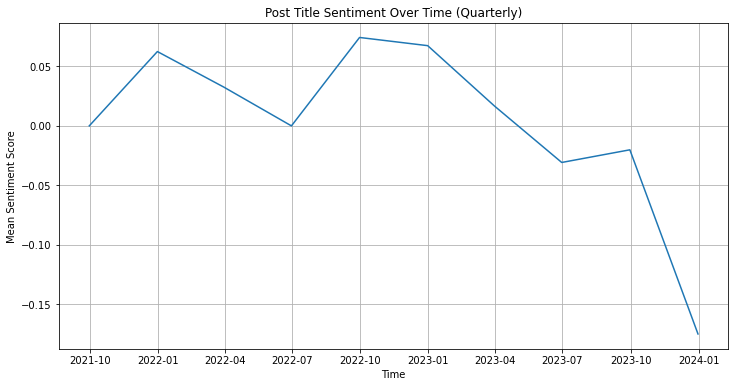

In [43]:
#This is using posts dataframe individually, and we do see a difference in the sentiment when we isolate the posts 

import pandas as pd
import matplotlib.pyplot as plt


# Set the 'Timestamp' column as the DataFrame index
posts_df.set_index('Timestamp', inplace=True)

# Define the time interval for aggregation (e.g., 'D' for daily, 'W' for weekly, 'Q' for quarterly)
time_interval = 'Q'

# Aggregate sentiment scores (example: using mean)
sentiment_agg = posts_df.resample(time_interval)['Post_Title_sentiment'].mean()

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(sentiment_agg.index, sentiment_agg.values)
plt.title('Post Title Sentiment Over Time (Quarterly)')
plt.xlabel('Time')
plt.ylabel('Mean Sentiment Score')
plt.grid(True)
plt.show()


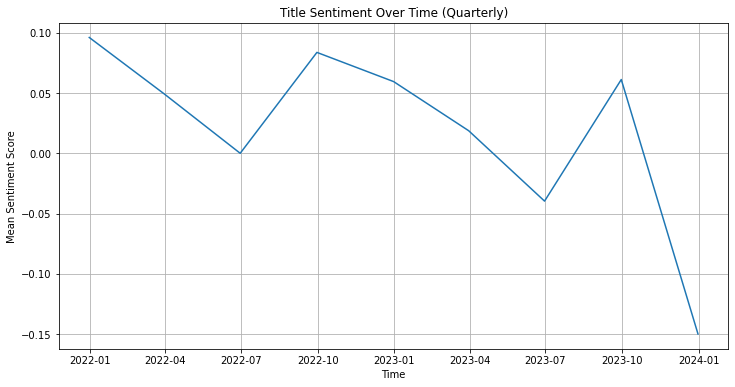

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Set the 'Timestamp_comment' column as the DataFrame index
combined_df.set_index('Timestamp_comment', inplace=True)

# Define the time interval for aggregation (e.g., 'D' for daily, 'W' for weekly, 'Q' for quarterly)
time_interval = 'Q'

# Aggregate sentiment scores (example: using mean)
sentiment_agg = combined_df.resample(time_interval)['Title_comment_sentiment'].mean()

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(sentiment_agg.index, sentiment_agg.values)
plt.title('Title Sentiment Over Time (Quarterly)')
plt.xlabel('Time')
plt.ylabel('Mean Sentiment Score')
plt.grid(True)
plt.show()


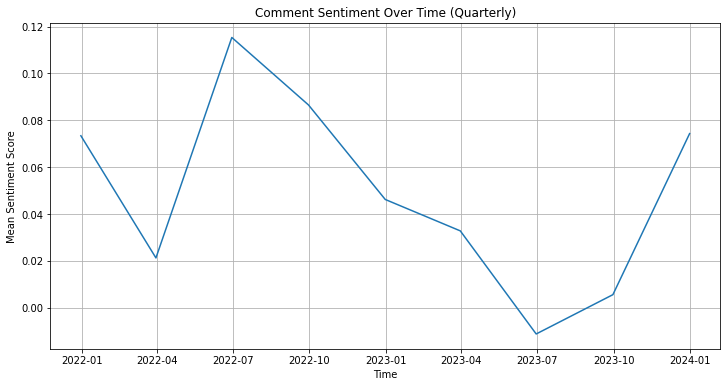

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


# Set the 'Timestamp_comment' column as the DataFrame index
combined_df.set_index('Timestamp_comment', inplace=True)

# Define the time interval for aggregation (e.g., 'D' for daily, 'W' for weekly, 'Q' for quarterly)
time_interval = 'Q'

# Aggregate sentiment scores (example: using mean)
sentiment_agg = combined_df.resample(time_interval)['Comment_Body_sentiment'].mean()

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(sentiment_agg.index, sentiment_agg.values)
plt.title('Comment Sentiment Over Time (Quarterly)')
plt.xlabel('Time')
plt.ylabel('Mean Sentiment Score')
plt.grid(True)
plt.show()


In [18]:
# Function to convert sentiment polarity to sentiment label
def get_sentiment_label(polarity):
    if polarity > 0:
        return "Positive sentiment"
    elif polarity < 0:
        return "Negative sentiment"
    else:
        return "Neutral sentiment"

# Apply sentiment analysis to the "Comment_Body" column and create a new column for sentiment labels
combined_df['Comment_Body_sentiment'] = combined_df['Comment_Body'].apply(analyze_sentiment)
combined_df['Comment_Body_sentiment_label'] = combined_df['Comment_Body_sentiment'].apply(get_sentiment_label)

# Apply sentiment analysis to the "Title_comment" column and create a new column for sentiment labels
combined_df['Title_comment_sentiment'] = combined_df['Title_comment'].apply(analyze_sentiment)
combined_df['Title_comment_sentiment_label'] = combined_df['Title_comment_sentiment'].apply(get_sentiment_label)


In [19]:
combined_df

,Post_ID,Comment_Body,Author,Title_comment,URL_comment,Subreddit_comment,Score_comment,Comment Count_comment,Up Votes_comment,Down Votes_comment,...,Up Votes_post,Down Votes_post,Quarter,Comment_Body_sentiment,Post_comment_sentiment,Title_comment_sentiment,Title_post_sentiment,Post_post_sentiment,Comment_Body_sentiment_label,Title_comment_sentiment_label
Timestamp_post,,,,,,,,,,,,,,,,,,,,,
2023-09-20 18:25:58,16nskog,goosestep moron like tri read book instead ...,Casperboy68,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,...,1157,0,Q3 2023,-0.800000,0.00000,0.0,0.0,0.00000,Negative sentiment,Neutral sentiment
2023-09-20 18:25:58,16nskog,welcom need 18 get librari card,Eyfordsucks,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,...,1157,0,Q3 2023,0.000000,0.00000,0.0,0.0,0.00000,Neutral sentiment,Neutral sentiment
2023-09-20 18:25:58,16nskog,parti person freedom ladi gentlemen,freddy_guy,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,...,1157,0,Q3 2023,0.000000,0.00000,0.0,0.0,0.00000,Neutral sentiment,Neutral sentiment
2023-09-20 18:25:58,16nskog,ban book ever better moral choic list parti g...,miataturbo99,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,...,1157,0,Q3 2023,0.200000,0.00000,0.0,0.0,0.00000,Positive sentiment,Neutral sentiment
2023-09-20 18:25:58,16nskog,yep illinoi tri find way around antibook ban l...,BoosterRead78,us book ban attempt ban rise effort extend pub...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,...,1157,0,Q3 2023,0.000000,0.00000,0.0,0.0,0.00000,Neutral sentiment,Neutral sentiment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-05 17:17:52,15j17yl,book ban defin subreddit anyth book store pu...,NoMagiciansAllowed,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,7,6,0,...,4,0,Q3 2023,-0.075000,-0.09375,0.0,0.0,-0.09375,Negative sentiment,Neutral sentiment
2023-08-05 17:17:52,15j17yl,book ban group extremist pressur school librar...,Birchwood_Goddess,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,7,6,0,...,4,0,Q3 2023,-0.103125,-0.09375,0.0,0.0,-0.09375,Negative sentiment,Neutral sentiment
2023-08-05 17:17:52,15j17yl,school librarian middl school crazi abl open...,Easy-Persimmon-8540,confus book ban,https://www.reddit.com/r/bannedbooks/comments/...,r/bannedbooks,6,7,6,0,...,4,0,Q3 2023,0.125000,-0.09375,0.0,0.0,-0.09375,Positive sentiment,Neutral sentiment


## Sentiment Analysis
### Visualizing Frequency Word Distribution
Reviewing how word distribution appear in the combined data frame along with the posts

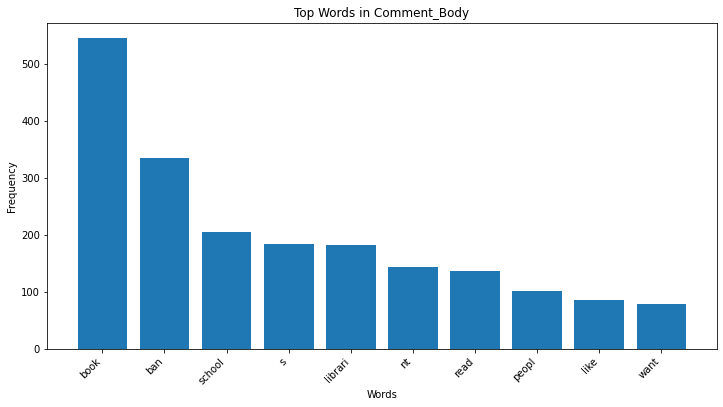

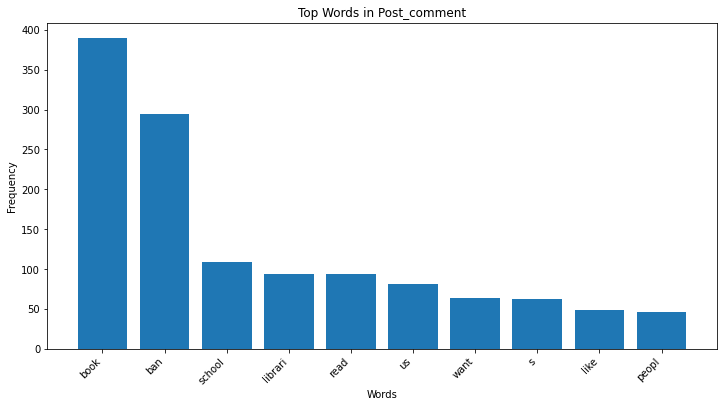

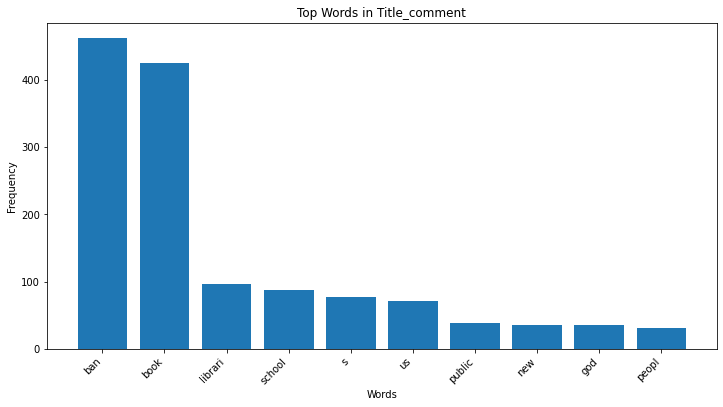

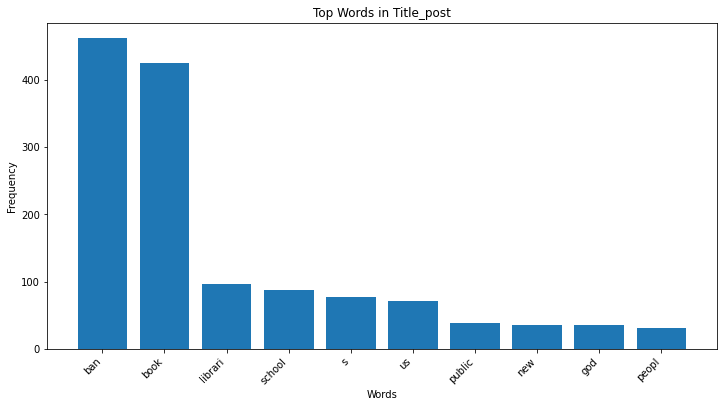

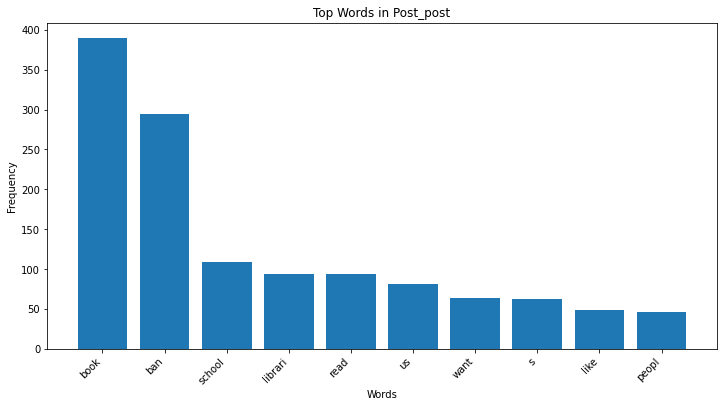

In [25]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from itertools import chain

# List of text columns to analyze
text_columns = ["Comment_Body", "Post_comment", "Title_comment", "Title_post", "Post_post"]

# Iterate through each text column
for column in text_columns:
    # Flatten the list of words from the current column
    all_text = list(chain.from_iterable(combined_df[column].str.split()))

    # Calculate word frequencies for the current column
    word_frequencies = Counter(all_text)

    # Get the most common words
    top_words = word_frequencies.most_common(10)  # You can adjust the number of top words to display

    # Visualize word frequencies for the current column
    words, frequencies = zip(*top_words)
    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies)
    plt.title(f'Top Words in {column}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha="right")
    plt.show()


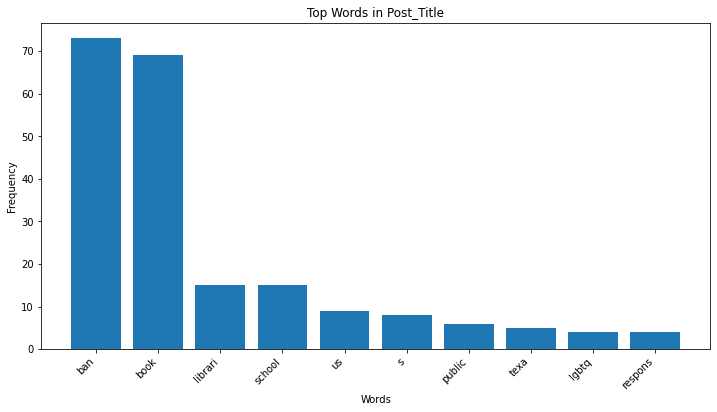

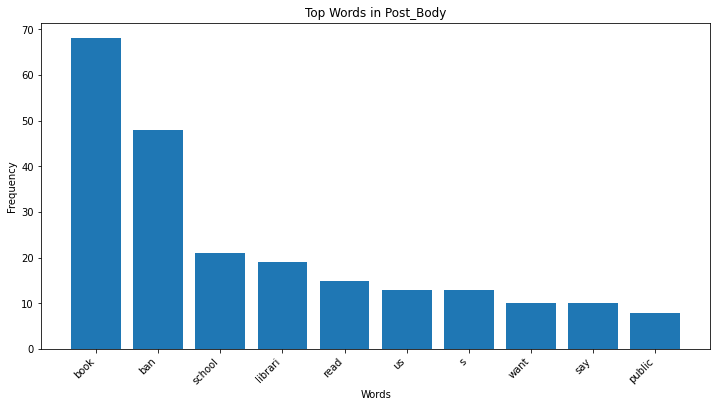

In [49]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from itertools import chain

# List of text columns to analyze
posts_text_columns = ["Post_Title", "Post_Body"]

# Iterate through each text column
for column in posts_text_columns:
    # Flatten the list of words from the current column
    all_text = list(chain.from_iterable(posts_df[column].str.split()))

    # Calculate word frequencies for the current column
    word_frequencies = Counter(all_text)

    # Get the most common words
    top_words = word_frequencies.most_common(10)  # You can adjust the number of top words to display

    # Visualize word frequencies for the current column
    words, frequencies = zip(*top_words)
    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies)
    plt.title(f'Top Words in {column}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha="right")
    plt.show()


## Sentiment Analysis
### VADER
Reviewing the comment body and how that sentiment looks with VADER

In [58]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER resources
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# get sentiment scores using VADER
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Apply VADER sentiment analysis to the 'Comment_Body' column
comments_df['VADER_Sentiment'] = comments_df['Comment_Body'].apply(get_vader_sentiment)

posts_df['VADER_Sentiment'] = posts_df['Post_Title'].apply(get_vader_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ingridarreola/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [52]:
comments_df.head(2)

,Post_ID,Comment_Body,Author,Title,URL,Subreddit,Score,Comment Count,Up Votes,Down Votes,Post,Year,Month,Comment_Body_sentiment,VADER_Sentiment
Timestamp,,,,,,,,,,,,,,,
2023-09-20 18:25:58,16nskog,goosestep moron like tri read book instead bur...,Casperboy68,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,NaN,2023,9,-0.8,"{'neg': 0.234, 'neu': 0.584, 'pos': 0.182, 'co..."
2023-09-20 18:25:58,16nskog,welcom need 18 get librari card,Eyfordsucks,US book bans and attempted bans rise as effort...,https://theguardian.com/books/2023/sep/20/book...,r/news,1156,158,1156,0,NaN,2023,9,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [59]:
posts_df.head(2)

,Post_Title,Post_Body,URL,Subreddit,Score,Post_ID,Comment Count,Up Votes,Down Votes,Year,Month,Post_Title_sentiment,Post_Body_sentiment,VADER_Sentiment
Timestamp,,,,,,,,,,,,,,
2023-05-05 11:18:12,teen access ban book onlin,brooklyn public librari join fight right teen ...,https://www.bklynlibrary.org/books-unbanned,books,12526,138il7e,982,12526,0,2023,5,0.0,0.095238,"{'neg': 0.474, 'neu': 0.526, 'pos': 0.0, 'comp..."
2023-10-02 16:41:00,ban book week librari,librari set display major challeng incid hea...,https://www.reddit.com/r/Libraries/comments/16...,Libraries,62,16y1i1g,41,62,0,2023,10,0.0,-0.118750,"{'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'comp..."


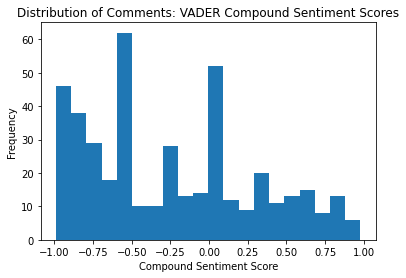

In [54]:
import matplotlib.pyplot as plt

# Comment histogram of the VADER compound scores
plt.hist(comments_df['VADER_Sentiment'].apply(lambda x: x['compound']), bins=20)
plt.title('Distribution of Comments: VADER Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()


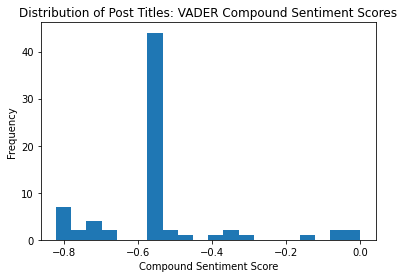

In [60]:
import matplotlib.pyplot as plt

# Posts histogram of the VADER compound scores
plt.hist(posts_df['VADER_Sentiment'].apply(lambda x: x['compound']), bins=20)
plt.title('Distribution of Post Titles: VADER Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.show()
